In [7]:
import cv2

In [23]:
image = cv2.imread("D:dl/dataset/voc/VOCtrainval_11-May-2012/VOCdevkit/VOC2012/JPEGImages/2007_000027.jpg")

In [24]:
image.shape

(500, 486, 3)

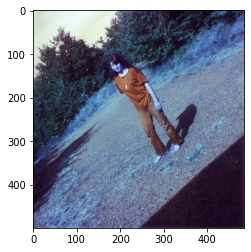

In [25]:
plt.subplot(111)
plt.imshow(image)

In [26]:
image = cv2.resize(image,(448,448))

In [27]:
image.shape

(448, 448, 3)

In [30]:
image = image[:,::-1,:]

In [21]:
import matplotlib.pyplot as plt

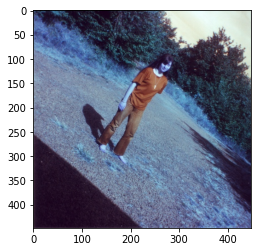

In [31]:
%matplotlib inline
plt.subplot(111)
plt.imshow(image)